# Vehicle Sales Simple EDA

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set_style()

In [2]:
data = pd.read_csv('car_prices.csv')
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Understanding Data

In [3]:
data.shape

(558837, 16)

In [4]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 558837 entries, 0 to 558836

Data columns (total 16 columns):

 #   Column        Non-Null Count   Dtype  

---  ------        --------------   -----  

 0   year          558837 non-null  int64  

 1   make          548536 non-null  object 

 2   model         548438 non-null  object 

 3   trim          548186 non-null  object 

 4   body          545642 non-null  object 

 5   transmission  493485 non-null  object 

 6   vin           558833 non-null  object 

 7   state         558837 non-null  object 

 8   condition     547017 non-null  float64

 9   odometer      558743 non-null  float64

 10  color         558088 non-null  object 

 11  interior      558088 non-null  object 

 12  seller        558837 non-null  object 

 13  mmr           558799 non-null  float64

 14  sellingprice  558825 non-null  float64

 15  saledate      558825 non-null  object 

dtypes: float64(4), int64(1), object(11)

memory usage: 68.2+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [7]:
data.describe(exclude='number').T

,count,unique,top,freq
make,548536,96,Ford,93554
model,548438,973,Altima,19349
trim,548186,1963,Base,55817
body,545642,87,Sedan,199437
transmission,493485,4,automatic,475915
vin,558833,550297,automatic,22
state,558837,64,fl,82945
color,558088,46,black,110970
interior,558088,17,black,244329
seller,558837,14263,nissan-infiniti lt,19693


## Handling Missing Values

In [8]:
data.isnull().sum()/data.count()*100

year             0.000000
make             1.877908
model            1.896112
trim             1.942954
body             2.418252
transmission    13.242956
vin              0.000716
state            0.000000
condition        2.160810
odometer         0.016823
color            0.134208
interior         0.134208
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

There are many missing values in the data. I'm going to remove the missing values. We have good number of data points and the missing values is less the 5% in almost all of the columns besides of 'Transmission' column as it has 13% of values missing. 

In [9]:
# We are filling missing values with 'Automatic' because it is the most used transmission type.

data['transmission'].fillna('automatic', inplace=True)

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.isnull().sum()/data.count()*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

We have successfully removed all the missing values either by removing them or replacing them with the alternative.

## Data Cleaning & Transforming

In [12]:
# Since year is a time based data, the best approach is to convert it into datetime data type.

data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year

In [13]:
data['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 36.,
       35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

The condition column has values between 1 to around 50 which is not correct. It should be between 1 to 5 as it does not look correct to me to have condition 45.

Let's change it into 1 to 5.

In [14]:
data['condition'].replace(range(10, 21), 1, inplace=True)
data['condition'].replace(range(20, 31), 2, inplace=True)
data['condition'].replace(range(30, 41), 3, inplace=True)
data['condition'].replace(range(40, 51), 4, inplace=True)

In [15]:
data['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [16]:
data['interior'].unique()

array(['black', 'beige', 'tan', 'brown', 'gray', '—', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

We can see that 'Color' and 'Interior' column has value '-' which is not correct, there might be any other color but since about that I have no knowledge or idea, i'll use 'MultiColor' as value. This way, we know it is our custom used value yet it will give meaning to the data.

In [17]:
data['color'].replace('—', 'multicolor', inplace=True)
data['interior'].replace('—', 'multicolor', inplace=True)

In [18]:
data['saledate'] = pd.to_datetime(data['saledate'], utc=True, format='mixed').dt.date

Saledate is also datetime column but it has simply object as data-type. We will convert it into datetime and keep the date part only discarding the time part.

In [19]:
data['body'] = data['body'].str.lower()

In [20]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,4.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14
3,2015,Volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,4.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28
4,2014,BMW,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,4.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


## Data Visualization

Let's define a function to create a Count Plot so we don't have to write all the necessary lines again and again.

In [21]:
def countplot(col, label, rotation=0, size=(12,6)):
    '''
    Create Count Plot using seaborn library.
    It takes four arguments.

    col (str): The column used to create countplot
    label (str): Name of x-label and it is also used as title.
    rotation (int): How much you want to rotate the x-ticks.
    size (tuple): It is a tuple and takes the size for figure in (width, height) format.
    '''
    plt.figure(figsize=size)
    plt.title(f'Count by Car {label}', fontsize=20)
    sns.countplot(x=data[col], palette='viridis')
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)

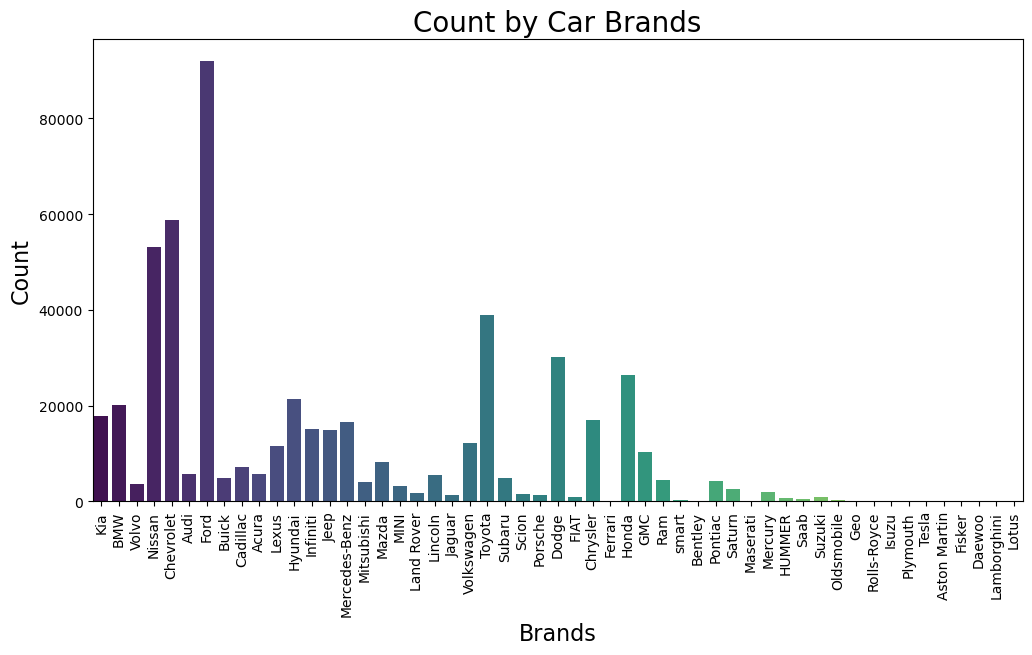

In [22]:
countplot('make', 'Brands', 90)

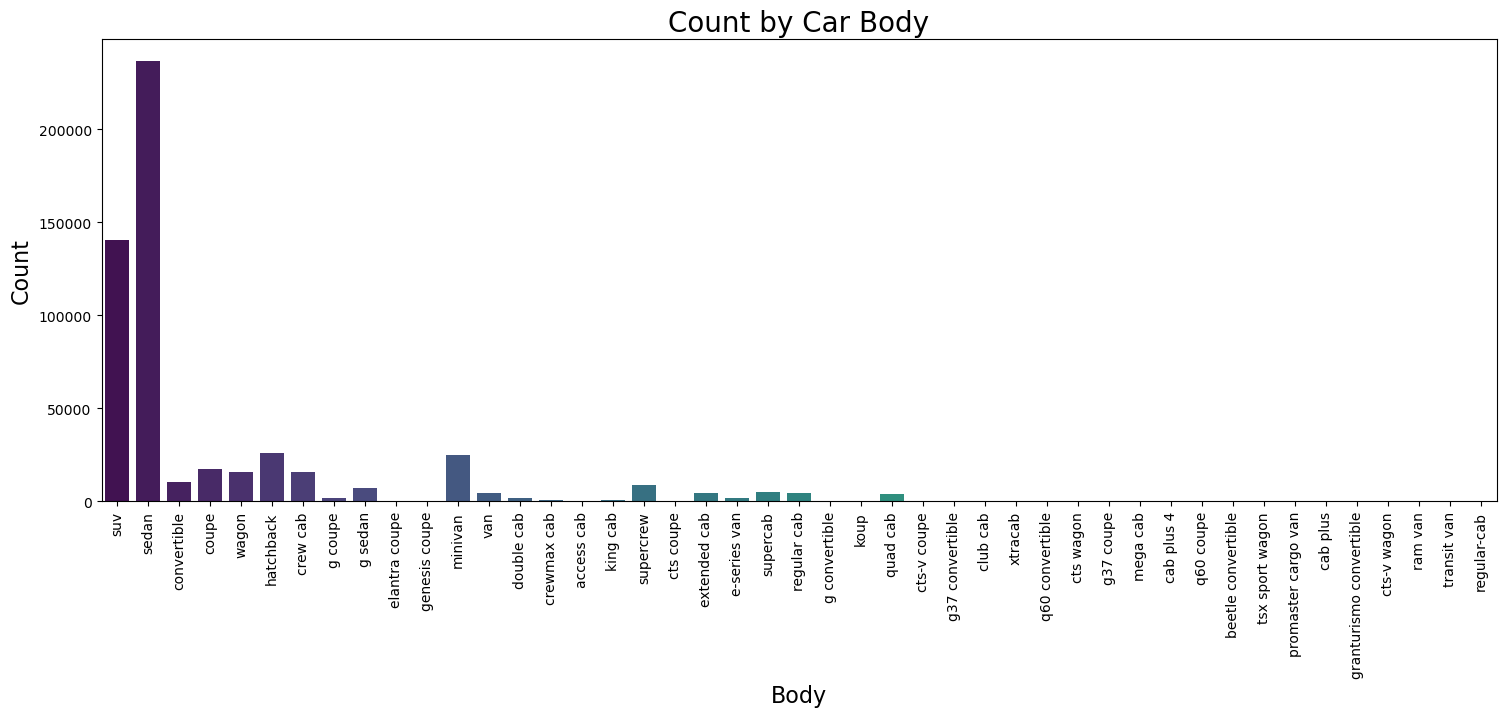

In [23]:
countplot('body', 'Body', 90, (18,6))

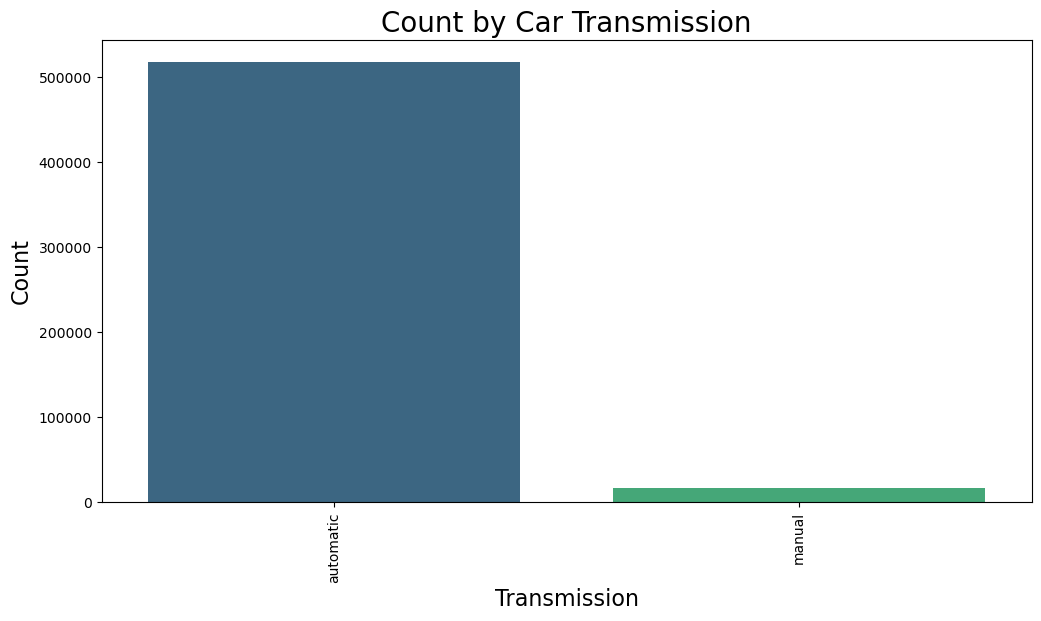

In [24]:
countplot('transmission', 'Transmission', 90)

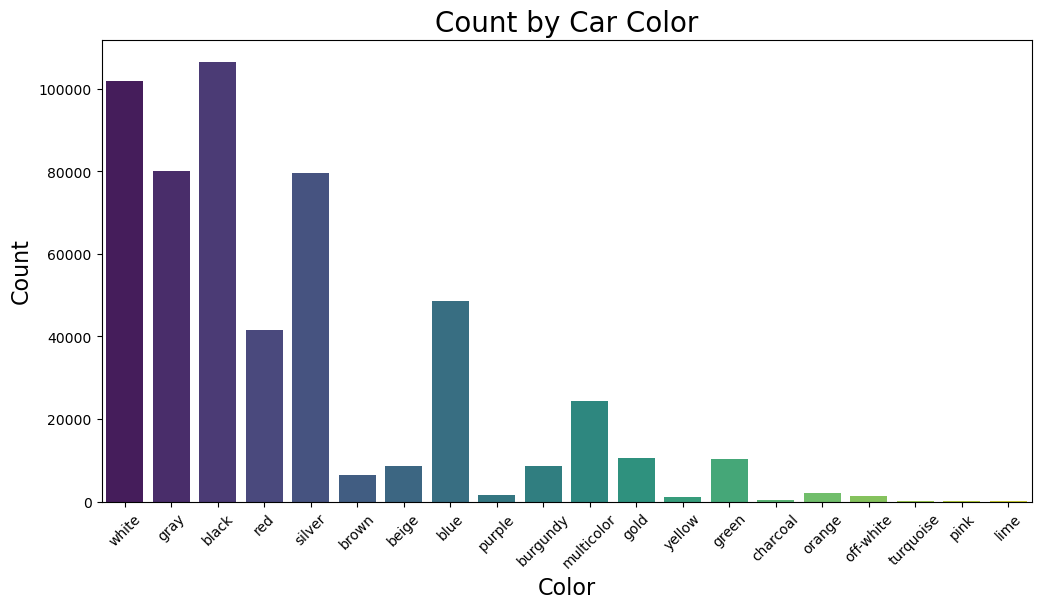

In [25]:
countplot('color', 'Color', 45)

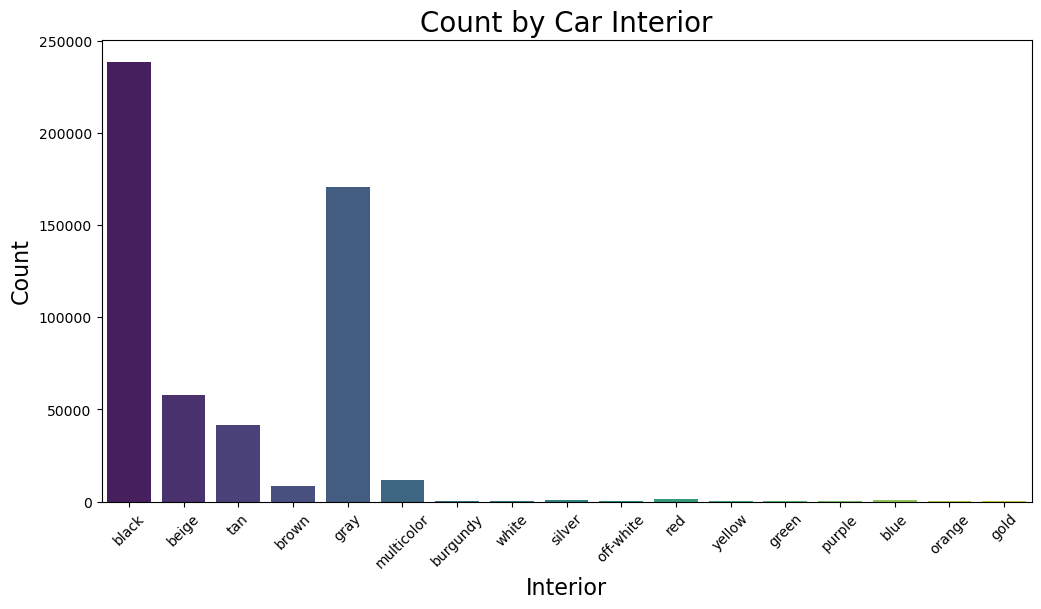

In [26]:
countplot('interior', 'Interior', 45)

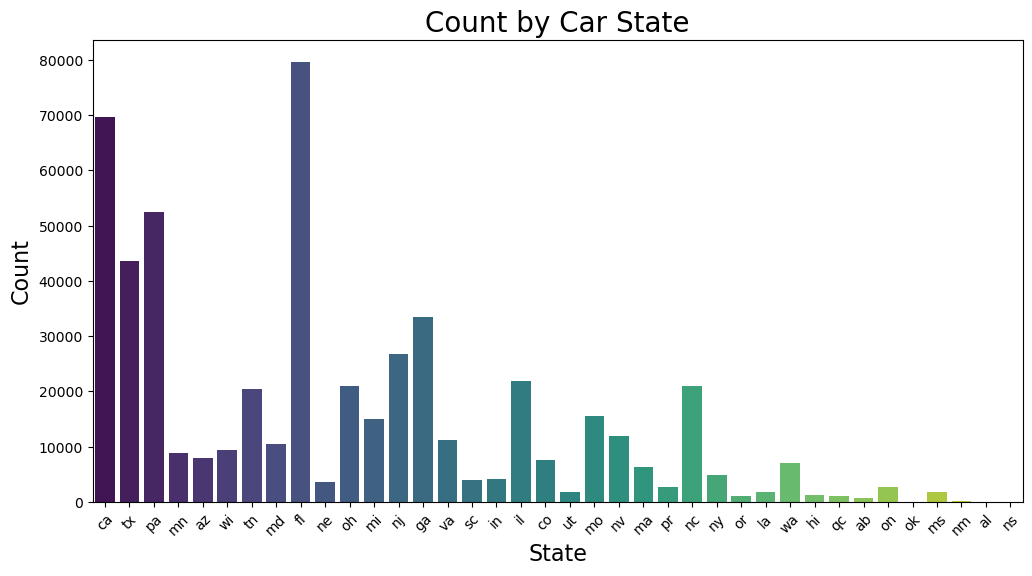

In [27]:
countplot('state', 'State', 45)

We have checked all necessary categorical columns there are some columns left such as 'Model', 'Trim', 'Vin', and 'Seller'. These columns have a lot of data points which will not help us understanding data or anything related that much.

In [28]:
def boxplot(col, label):
    '''
        Create Boxplot from the given data series.

        col (string): Used as column for dataframe.

        label (string): Used as label and title for chart.
    
    '''

    plt.figure(figsize=(10,6))
    sns.boxplot(data[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.ylabel(label, fontsize=16)


def histplot(col, label):
    '''
        Create Boxplot from the given data series.

        col (string): Used as column for dataframe.

        label (string): Used as label and title for chart.
    
    '''

    plt.figure(figsize=(10,6))
    sns.histplot(data[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.xlabel(label, fontsize=16)

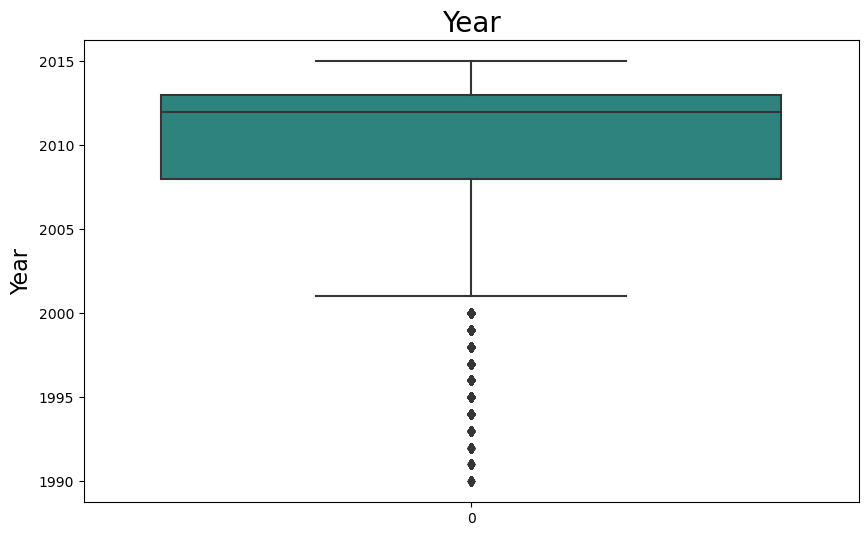

In [29]:
boxplot('year', 'Year')

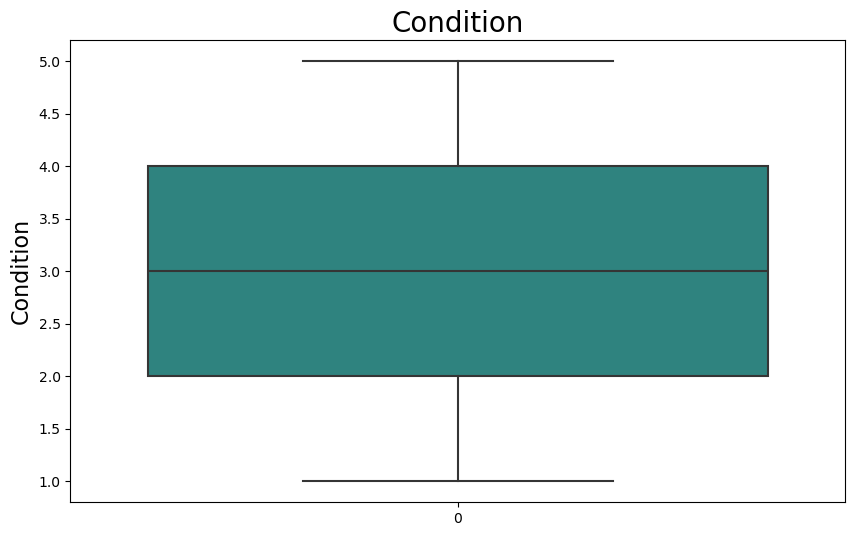

In [30]:
boxplot('condition', 'Condition')

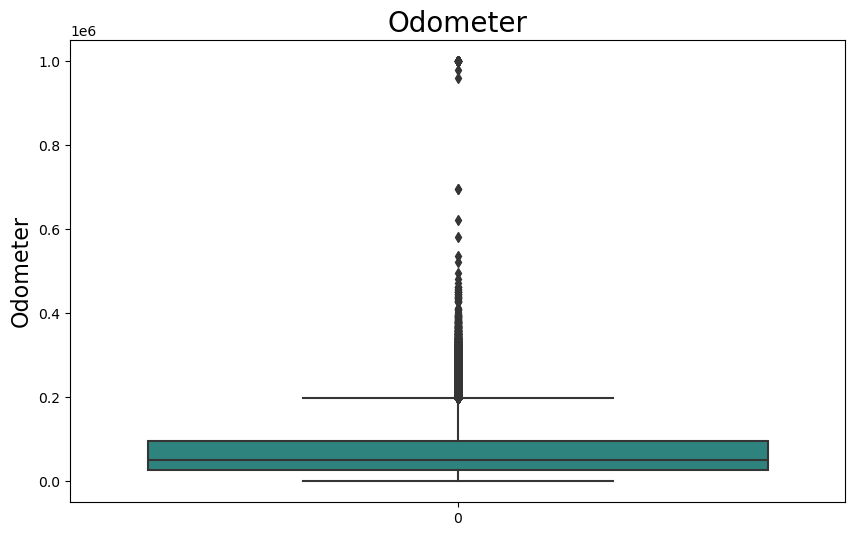

In [31]:
boxplot('odometer', 'Odometer')

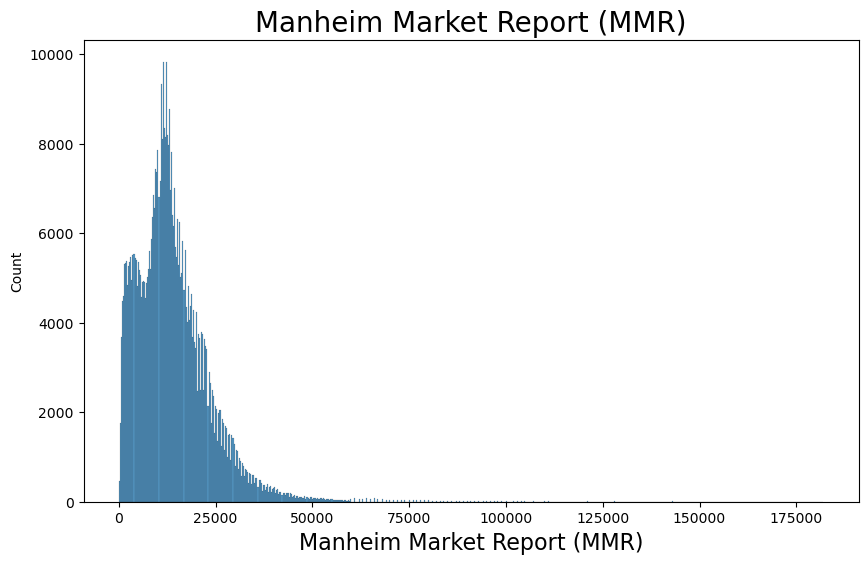

In [32]:
histplot('mmr', 'Manheim Market Report (MMR)')

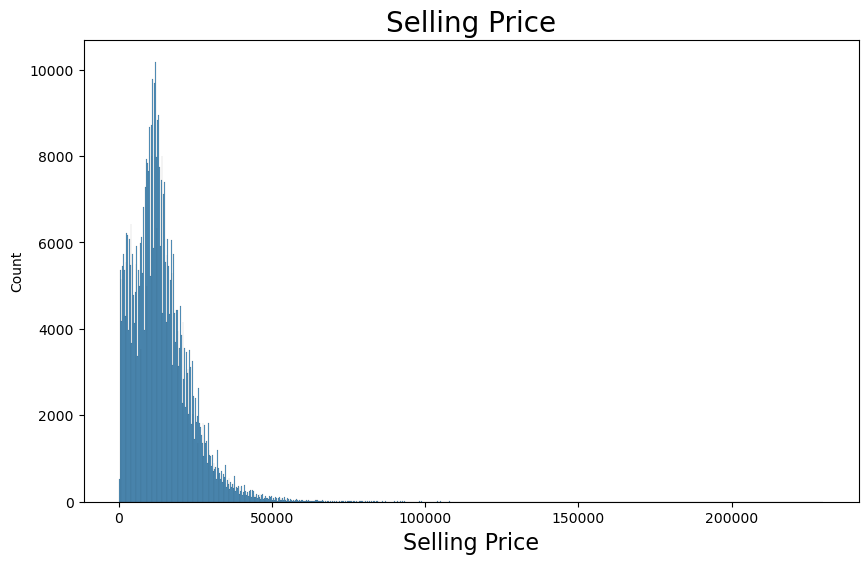

In [33]:
histplot('sellingprice', 'Selling Price')

Checking out these results we can see that all these columns have number of outliers and the 'MMR', 'Selling Price' column is highly skewed to the right.

In [34]:
cat_col = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller']
num_col = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

<Axes: >

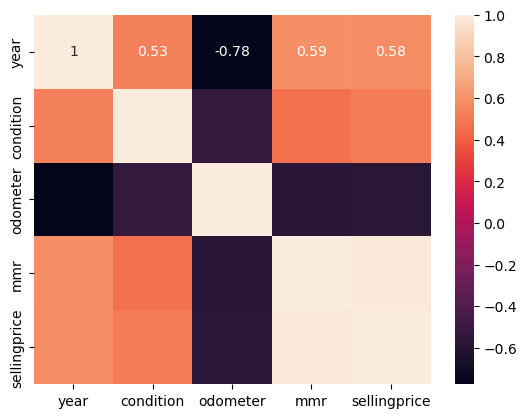

In [35]:
sns.heatmap(data[num_col].corr(), annot=True)

In [36]:
data.groupby('make')[['sellingprice', 'condition']].mean().sort_values(by=['sellingprice', 'condition'], ascending=False)

,sellingprice,condition
make,,
Rolls-Royce,153456.250000,3.750000
Ferrari,127210.526316,3.526316
Lamborghini,112625.000000,4.000000
Bentley,74349.130435,3.295652
Tesla,67054.347826,3.869565
Aston Martin,54812.000000,3.200000
Fisker,46461.111111,3.555556
Maserati,45632.442748,3.274809
Lotus,40800.000000,2.000000


Text(0, 0.5, 'Selling Price')

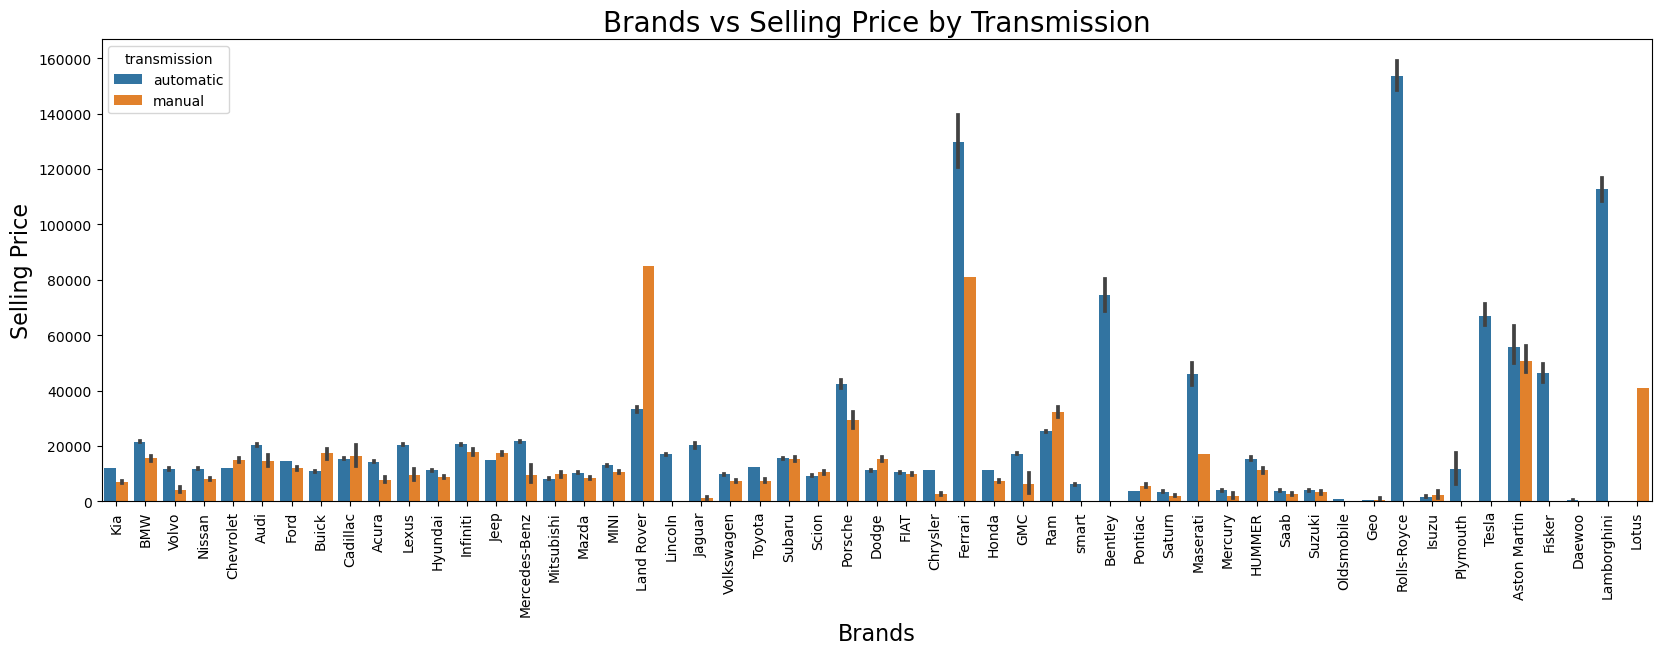

In [37]:
plt.figure(figsize=(20,6))
plt.title('Brands vs Selling Price by Transmission', fontsize=20)
sns.barplot(x=data['make'], y=data['sellingprice'], hue=data['transmission'])
plt.xlabel('Brands', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'MMR')

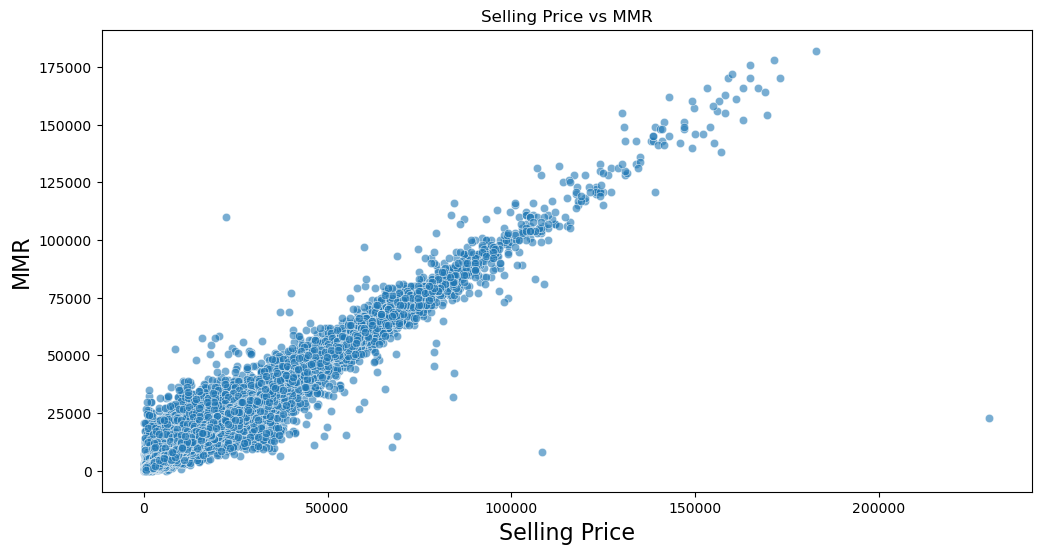

In [38]:
plt.figure(figsize=(12,6))
plt.title('Selling Price vs MMR')
sns.scatterplot(x=data['sellingprice'], y=data['mmr'], palette='magma', alpha=0.6)
plt.xlabel('Selling Price', fontsize=16)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'MMR')

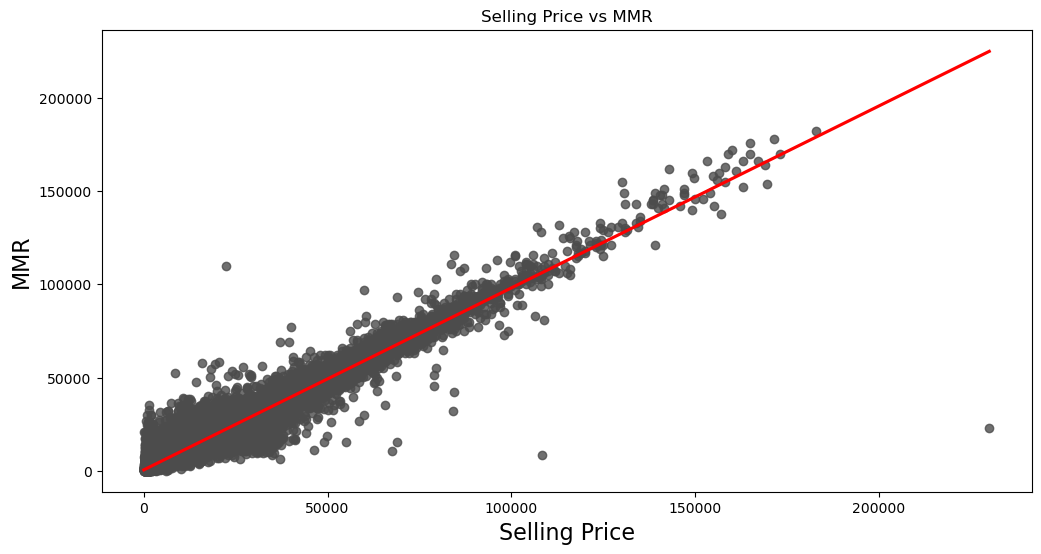

In [39]:
plt.figure(figsize=(12,6))
plt.title('Selling Price vs MMR')
sns.regplot(x=data['sellingprice'], y=data['mmr'], marker='o', color=".3", line_kws=dict(color="r"))
plt.xlabel('Selling Price', fontsize=16)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'MMR')

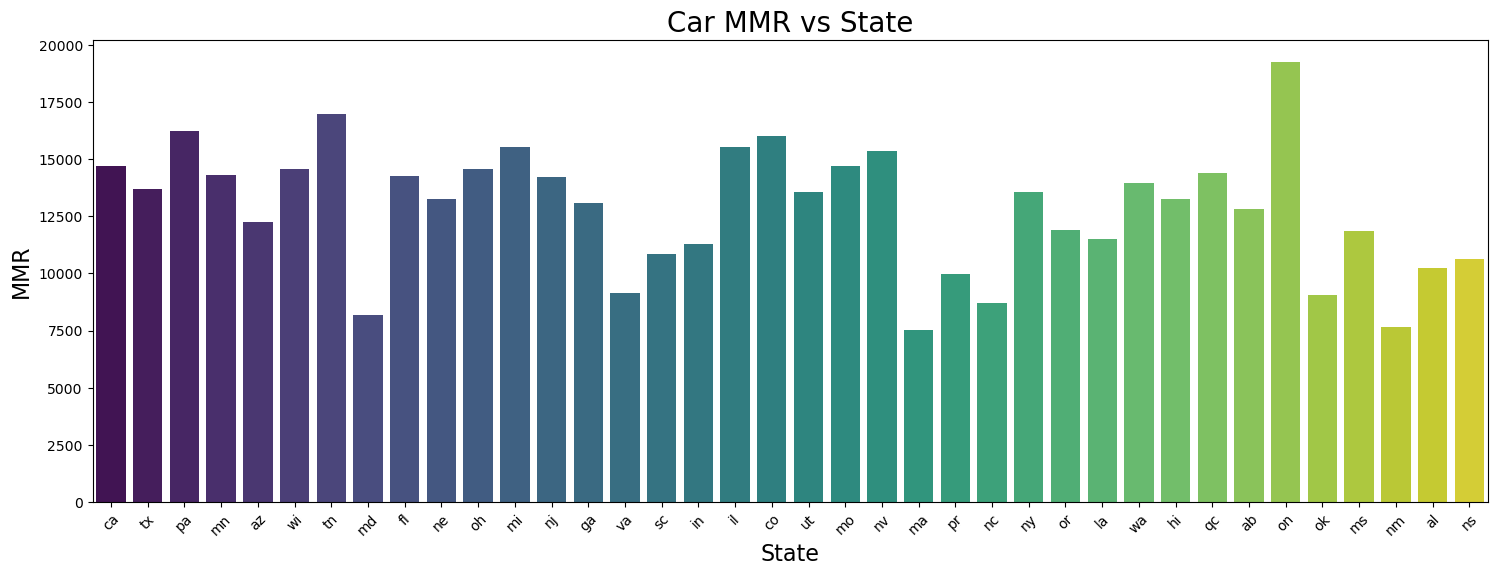

In [40]:
plt.figure(figsize=(18,6))
plt.title('Car MMR vs State', fontsize=20)
sns.barplot(x=data['state'], y=data['mmr'], errorbar=None, palette='viridis')
plt.xlabel('State', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'Selling Price')

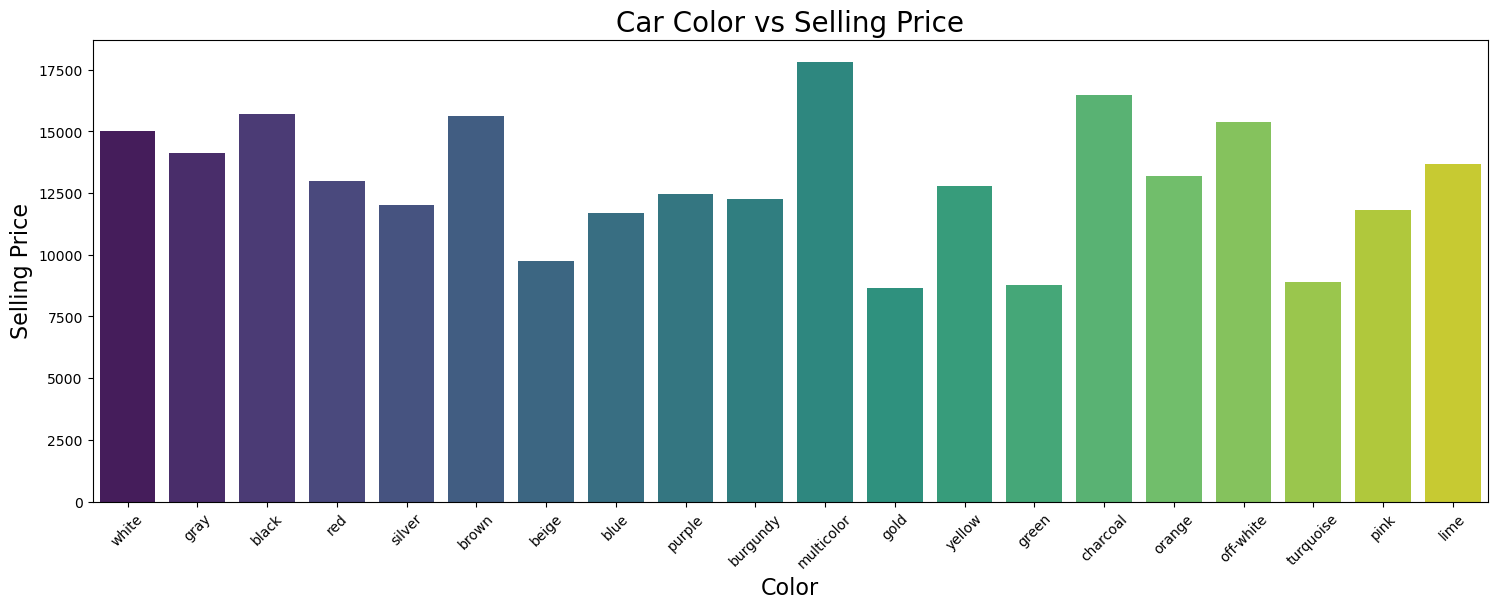

In [41]:
plt.figure(figsize=(18,6))
plt.title('Car Color vs Selling Price', fontsize=20)
sns.barplot(data=data, x='color', y='sellingprice', errorbar=None, palette='viridis')
plt.xlabel('Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Selling Price')

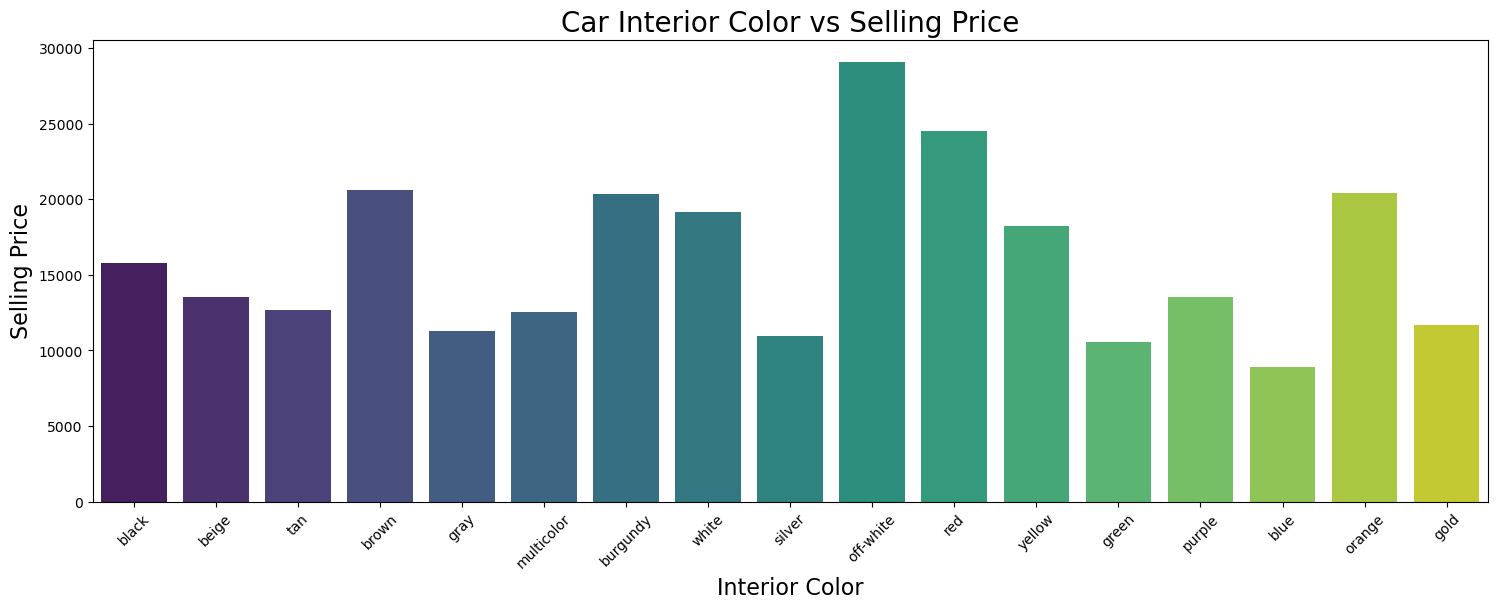

In [42]:
plt.figure(figsize=(18,6))
plt.title('Car Interior Color vs Selling Price', fontsize=20)
sns.barplot(data=data, x='interior', y='sellingprice', errorbar=None, palette='viridis')
plt.xlabel('Interior Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Car Travelled')

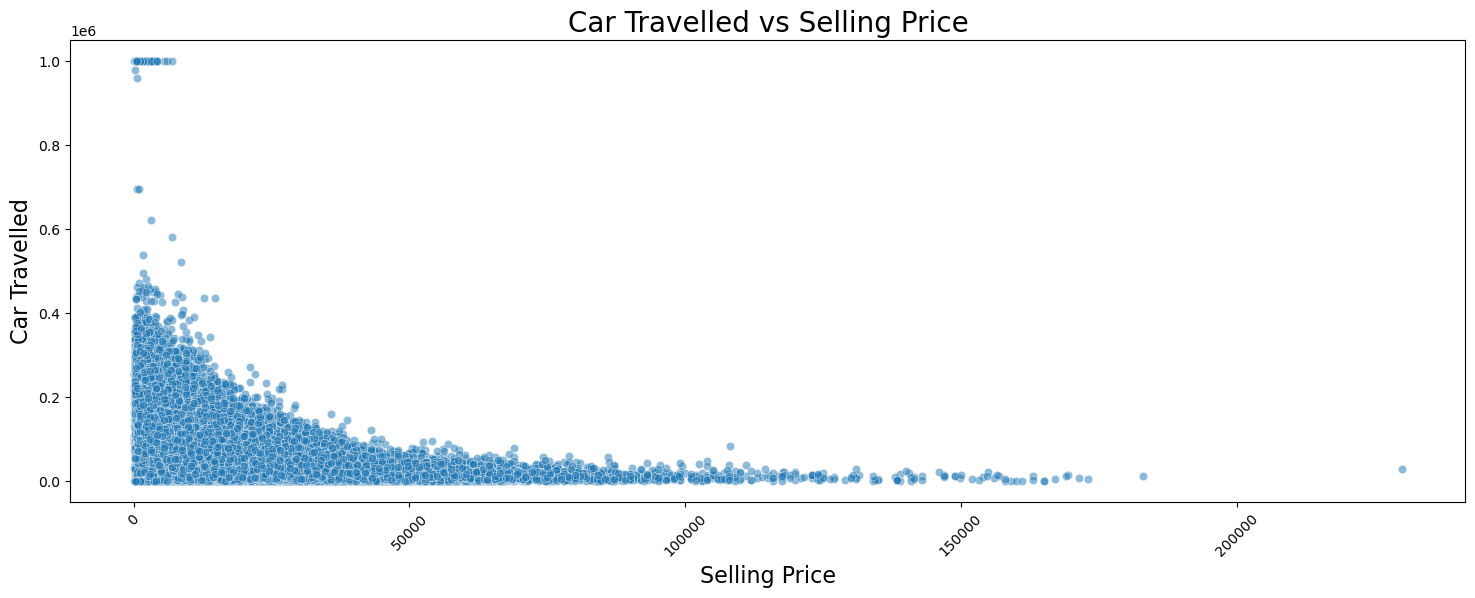

In [43]:
plt.figure(figsize=(18,6))
plt.title('Car Travelled vs Selling Price', fontsize=20)
sns.scatterplot(x=data['sellingprice'], y=data['odometer'], palette='viridis', alpha=0.5)
plt.xlabel('Selling Price', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Car Travelled', fontsize=16)

Text(0, 0.5, 'Selling Price')

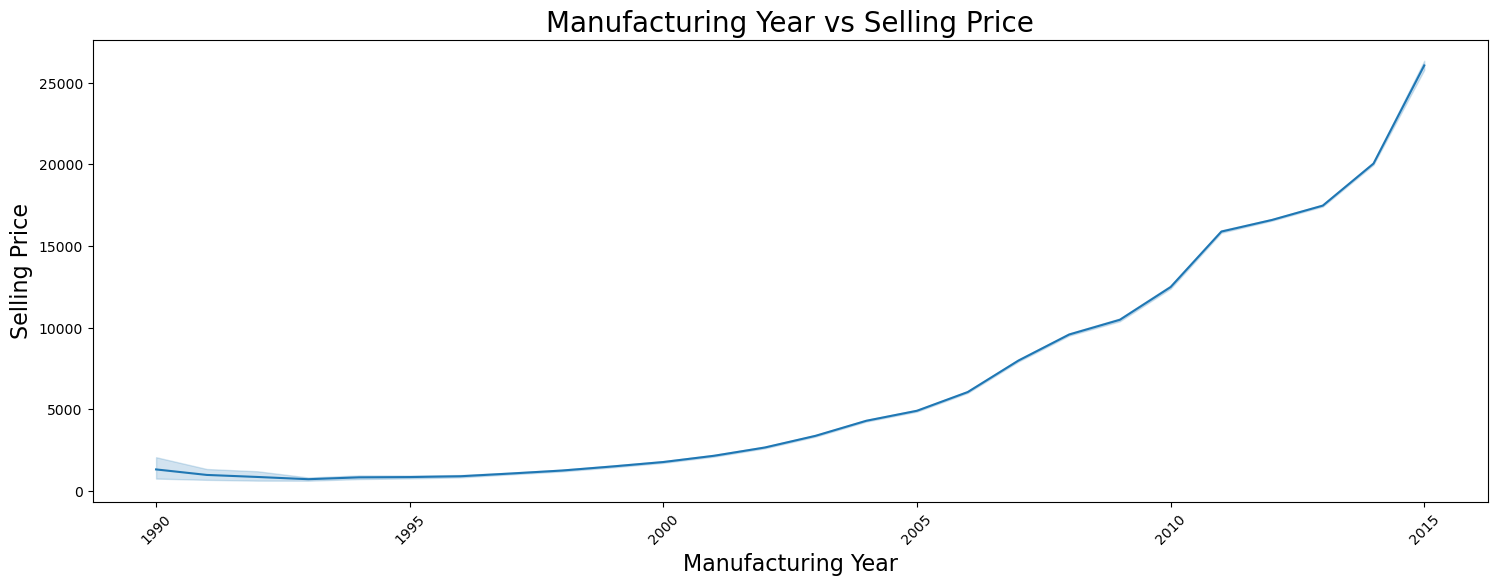

In [44]:
plt.figure(figsize=(18,6))
plt.title('Manufacturing Year vs Selling Price', fontsize=20)
sns.lineplot(x=data['year'], y=data['sellingprice'], palette='viridis')
plt.xlabel('Manufacturing Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Selling Price')

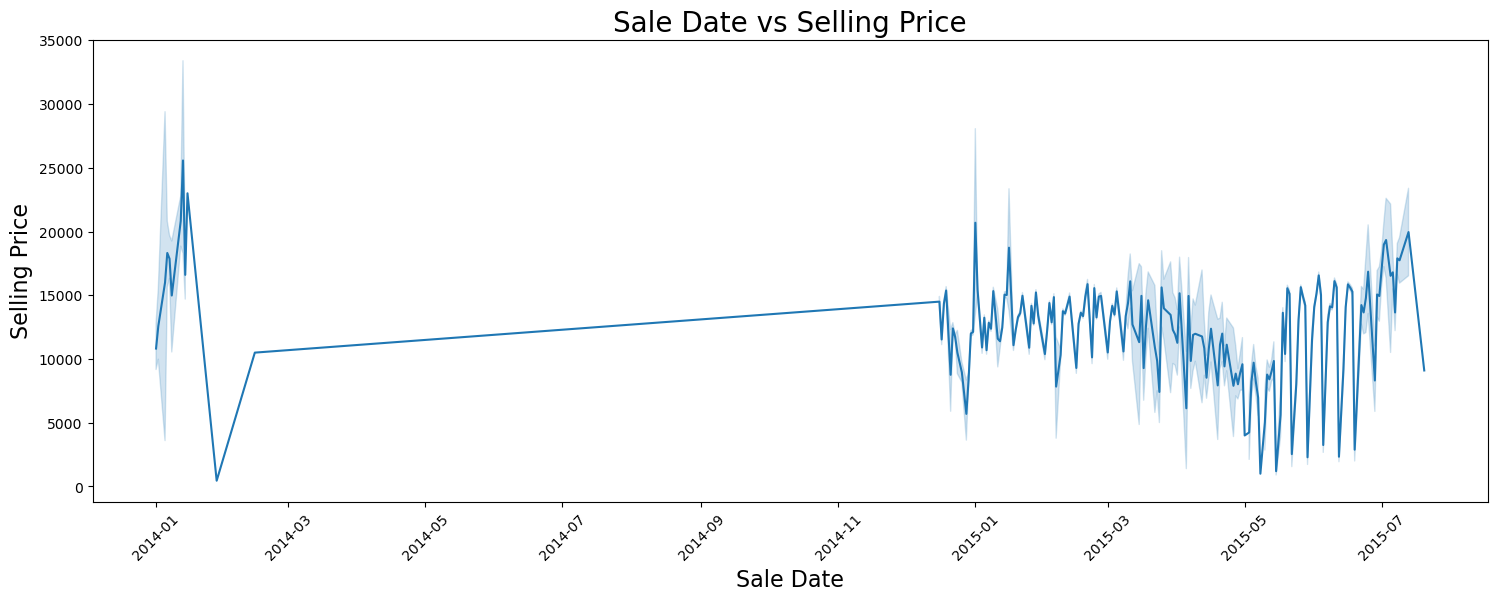

In [45]:
plt.figure(figsize=(18,6))
plt.title('Sale Date vs Selling Price', fontsize=20)
sns.lineplot(x=data['saledate'], y=data['sellingprice'], palette='viridis')
plt.xlabel('Sale Date', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

## Report

After finishing the EDA let's see what we have.

1. We have 558837 rows and 16 columns at first after importing the data. These 16 columns have 5 integer type columns and rest 11 are object or we can say string type columns.

2. As per the statistical analysis we can say that the Manheim Market Report (MMR) and Selling Price are quite close. The max of odometer is 999999 which seems very high but it is not impossible.

3. We have some cars manufactured in 1982 this might result as having some Vintage Cars in the dataset.

4. There are lots of missing values in dataset. Transmission has the highest missing values about 13% which is quite high. Other than this Make, Model, Trim, Body, and Condition have 1%-2% missing values. Besides these other have less than 1% missing values.
5. We have Year and Sale date columns which should be of datetime data type but they are in int and object type so we'll convert them.
6. The condition column have values such as 45, 59, 34 etc but this is not correct as it is a column which should have values between 1-5 as rating.
7. The 'Color' and 'Interior' columns has data point with values '-' which replaced by 'Multicolor' as we don't want to add more values to a particular color.
8. 'Body' column values have some inconsistensies like Sedan, sedan or SUV, suv.
9. Ford, Chevrolet, Nissan, Toyota, and Dodge are the top 5 brands by the count.
10. Sedan and SUV are the top 2 body types used in cars.
11. Automtic transmission is most counted, it also maked the dataset imbalanced based on transmission.
12. There are different color cars but 'Black' and 'Grey' are the most used interior color.
13. Florida and California have 70k-80k and more cars while all other are below 50k cars.
14. The minimum and maximum of manufactured year of car is 2000 and 2015 but there are some outlier cars whose manufactured year is 1990 or less.
15. Most of the condition of cars come between 2 to 4 rating but there are some cars whose condition is either 1 or 5 too.
16. The maximum of odometer display is about 200000 but there are many outliers too such as some cars even travelled 999999 which looks very inconvincing.
17. The MMR and Selling price is quite identical. There is high spike of cars between the prices of 10000-20000 and both are right skewed data.
18. The Sale date of cars are from year 2015 and last two months of year 2014 whereas the first quarter of year 2014 is treated as outlier.
19. The correlation of the columns fall between -0.78 to 0.98, which is an indication that there is some multicolinearity.
20. The avearge car price of costliest car is Rolls Royce with price of $153456.25 while the cheapest car is DOdge with price of $450.00.
21. The sellin price of automatic transmission car brands is highest besides of two brands Land Rover and Lotus. Lotus does not have car of automatic transmission while Rolls-Royce does not have car of manual transmission.
22. Our scatterplot and also regplot shows that MMR and Selling Price is very much correlated but it also showing there are some of data points which are very much off in respect of other.
23. Car color and Interior color is not very affecting variable for the Selling price.
24. The distance travelled by car and selling price does have a negative relation but it is not vey much decisive in case of Selling price.
25. Cars manufactured after year 2000 shows and upward trend in respect of Selling price. While there is no trend between sale date and selling price, it just kind of random walk.

# Some Questions about Data

## 1. What are the most sold car models?

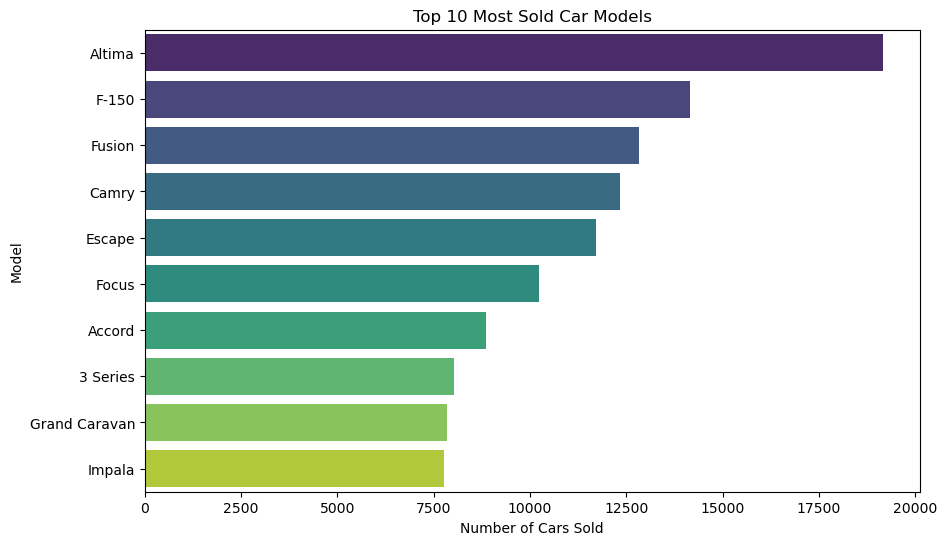

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the most sold car models
top_models = data['model'].value_counts().head(10)

# Visualize the most sold car models
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title('Top 10 Most Sold Car Models')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Model')
plt.show()

## 2. Which manufacturers have the highest number of sales?

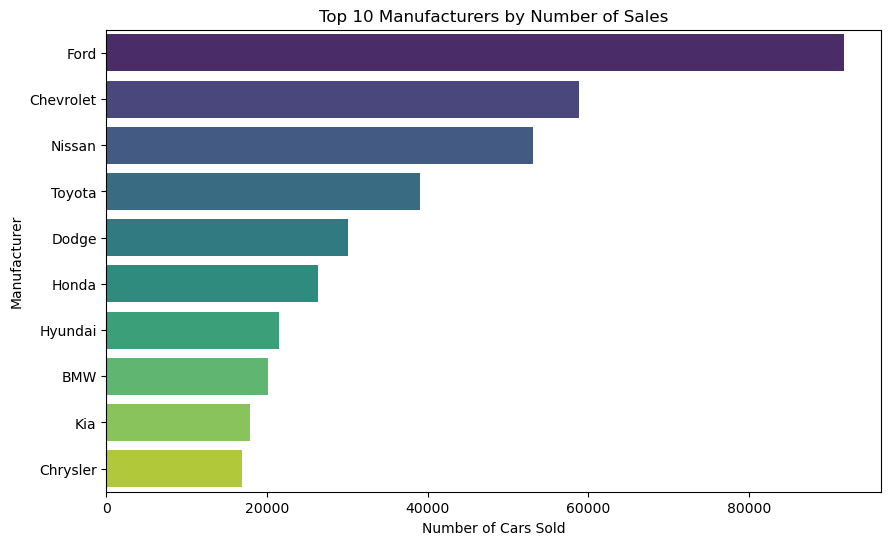

In [48]:
# Count the manufacturers with the highest number of sales
top_makes = data['make'].value_counts().head(10)

# Visualize the manufacturers with the highest number of sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top 10 Manufacturers by Number of Sales')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Manufacturer')
plt.show()


## 3. What is the distribution of car selling prices?

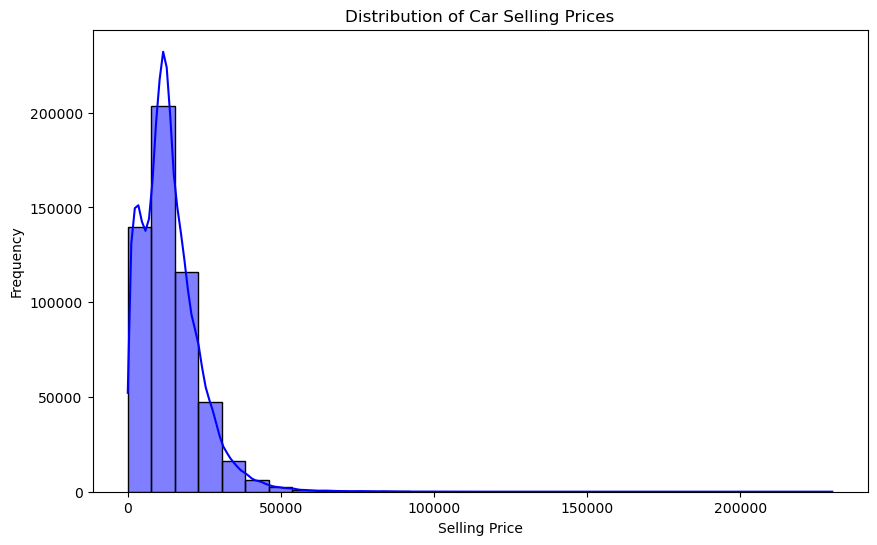

In [50]:
# Visualize the distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(data['sellingprice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Car Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

## 5. How does the average selling price of cars vary by make?

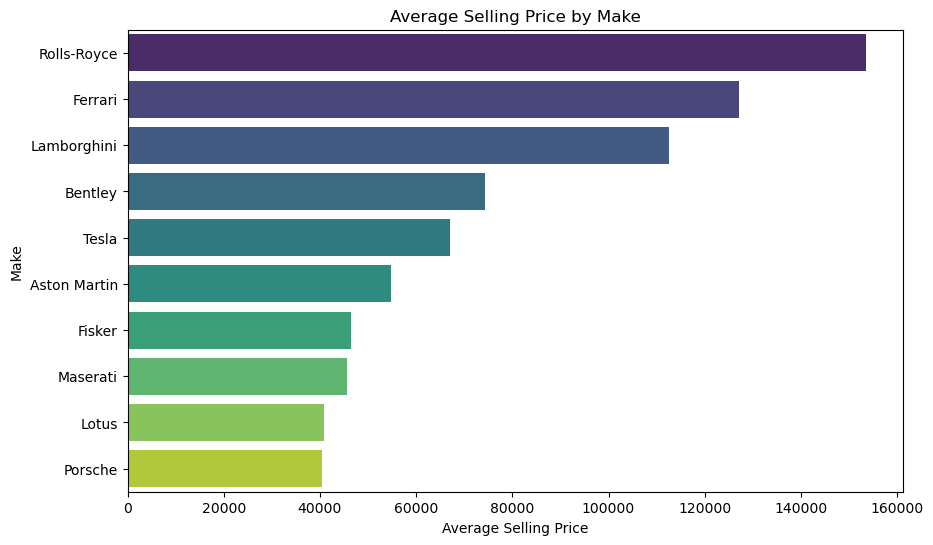

In [52]:
# Calculate the average selling price by make
average_price_per_make = data.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(10)

# Visualize the average selling price by make
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_per_make.values, y=average_price_per_make.index, palette='viridis')
plt.title('Average Selling Price by Make')
plt.xlabel('Average Selling Price')
plt.ylabel('Make')
plt.show()

## 6. How does the average selling price of cars vary by state?

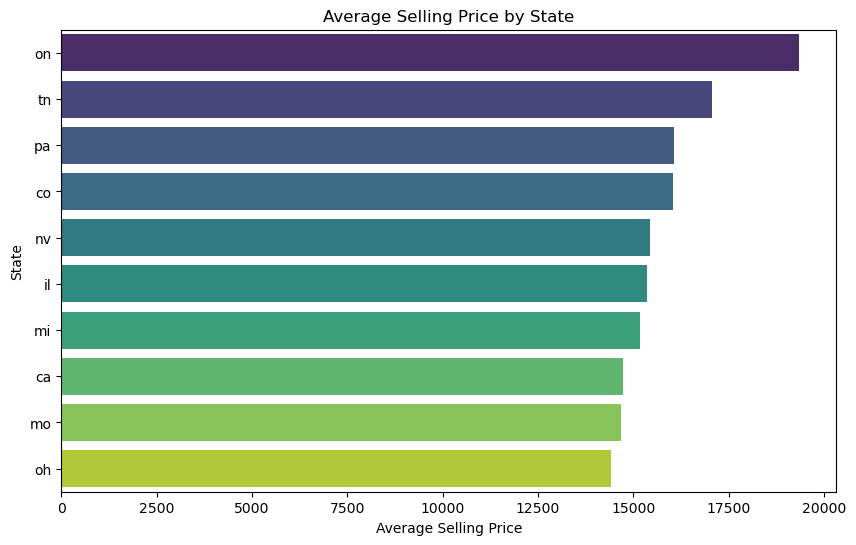

In [53]:
# Calculate the average selling price by state
average_price_per_state = data.groupby('state')['sellingprice'].mean().sort_values(ascending=False).head(10)

# Visualize the average selling price by state
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_per_state.values, y=average_price_per_state.index, palette='viridis')
plt.title('Average Selling Price by State')
plt.xlabel('Average Selling Price')
plt.ylabel('State')
plt.show()